## HW7 Digital Music Filtering


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from IPython.display import Audio

In [3]:
[fs, funky] = wavfile.read('funky.wav')

In [36]:
Audio(funky, rate=fs) #listen

## Lowpass Filter

In [7]:
[fs,funky] = wavfile.read('funky.wav')
fNorm = 200/(fs/2)
b, a = signal.butter(10, fNorm, 'lowpass')
funkylow = signal.filtfilt(b,a,funky)

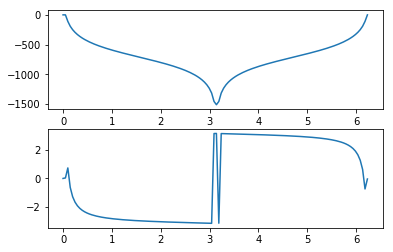

In [11]:
w, h = signal.freqz(b,a,128,fs) #128 is parameter related to sampling of the frequency response

#plot frequency response
plt.subplot(2,1,1)
plt.plot(w, 20*np.log(np.absolute(h)))
plt.subplot(2,1,2)
plt.plot(w, np.angle(h))
plt.show()

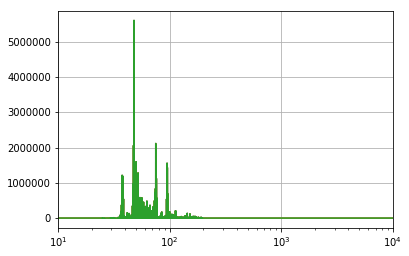

In [14]:
# plot spectrum of the output

f, Pxx_den = signal.periodogram(funkylow, fs)
plt.semilogx(f, Pxx_den)
plt.grid()
plt.xlim(10, 10**4)
plt.show()

In [16]:
#play output
Audio(funkylow, rate=fs)

In [ ]:
Explanation: This filter lets us hear the bass sounds nice and clear.

## High pass filter

In [17]:
[fs,funky] = wavfile.read('funky.wav')
fNorm = 5000/(fs/2)
b, a = signal.butter(10, fNorm, 'highpass')
funkyhigh = signal.filtfilt(b,a,funky)

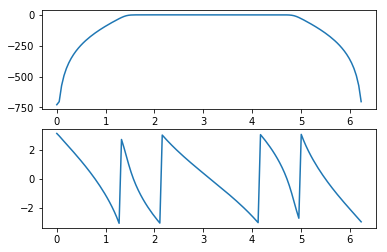

In [18]:
w, h = signal.freqz(b,a,128,fs) #128 is parameter related to sampling of the frequency response

#plot frequency response
plt.subplot(2,1,1)
plt.plot(w, 20*np.log(np.absolute(h)))
plt.subplot(2,1,2)
plt.plot(w, np.angle(h))
plt.show()

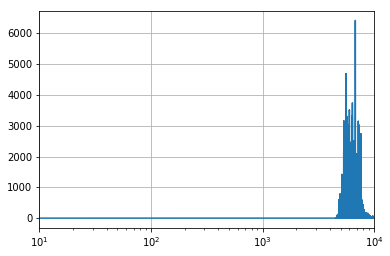

In [19]:
# plot spectrum of the output

f, Pxx_den = signal.periodogram(funkyhigh, fs)
plt.semilogx(f, Pxx_den)
plt.grid()
plt.xlim(10, 10**4)
plt.show()

In [20]:
#play output
Audio(funkyhigh, rate=fs)

Explanation: When the music clip is filtered through the high pass filter, we can only hear freqencies above 5000 Hz, so basically only the tambourine sound can be heard.

## Band-pass filter

In [21]:
[fs,funky] = wavfile.read('funky.wav')
fLow = 1000/(fs/2)
fHigh = 2500/(fs/2)
b, a = signal.butter(10, [fLow, fHigh], 'bandpass')
funkybpass = signal.filtfilt(b,a,funky)

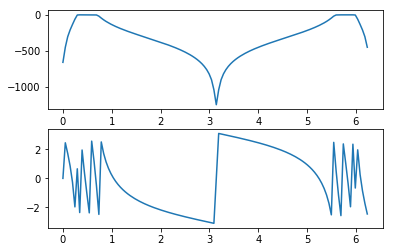

In [22]:
w, h = signal.freqz(b,a,128,fs) #128 is parameter related to sampling of the frequency response

#plot frequency response
plt.subplot(2,1,1)
plt.plot(w, 20*np.log(np.absolute(h)))
plt.subplot(2,1,2)
plt.plot(w, np.angle(h))
plt.show()

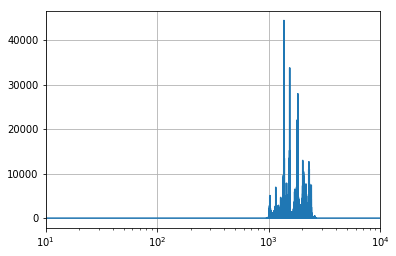

In [24]:
# plot spectrum of the output

f, Pxx_den = signal.periodogram(funkybpass, fs)
plt.semilogx(f, Pxx_den)
plt.grid()
plt.xlim(10, 10**4)
plt.show()

In [25]:
# play output
Audio(funkybpass, rate=fs)

Explanation: Frequencies below 1000 and above 2500 are suppressed, resulting in an unclear recording with the rhythm heard faintly in the background.

## Further exploration

What filter sounds the best? Personally I want to try removing frequencies between 2000 and 4000 Hz. I'll also try speeding up and slowing down the song.

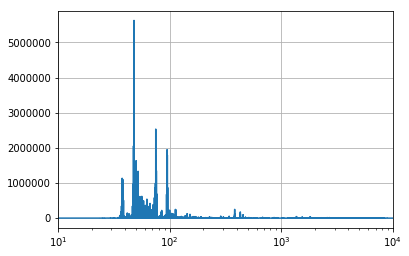

In [39]:
# see the full frequency spectrum
# plot spectrum of the output

f, Pxx_den = signal.periodogram(funky, fs)
plt.semilogx(f, Pxx_den)
plt.grid()
plt.xlim(10, 10**4)
plt.show()

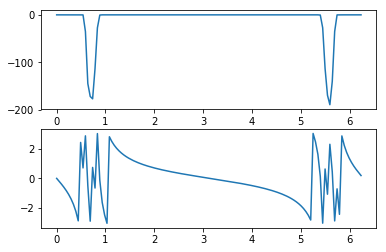

In [55]:
[fs,funky] = wavfile.read('funky.wav')
fLow = 2000/(fs/2)
fHigh = 3000/(fs/2)
b, a = signal.butter(10, [fLow, fHigh], 'bandstop')
funkybstop = signal.filtfilt(b,a,funky)

w, h = signal.freqz(b,a,128,fs) #128 is parameter related to sampling of the frequency response

#plot frequency response
plt.subplot(2,1,1)
plt.plot(w, 20*np.log(np.absolute(h)))
plt.subplot(2,1,2)
plt.plot(w, np.angle(h))
plt.show()

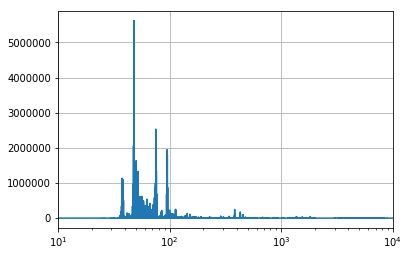

In [62]:
# plot spectrum of the output

f, Pxx_den = signal.periodogram(funkybstop, fs)
plt.semilogx(f, Pxx_den)
plt.grid()
plt.xlim(10, 10**4)
plt.show()

In [57]:
Audio(funkybstop, rate=fs)

Observations: THis gives it more of a retro feel, with some frequencies missing in the mid range, but still has enough that it sounds good.

In [61]:
# slow down
Audio(funkybstop, rate= 0.83 * fs)

In [60]:
# speed up
Audio(funkybstop, rate= 1.15 * fs)